# Tutorial 2 : Neural Processes - 1D GP Data

Last Update : 26 August 2019

**Aim**: 
- Training a simple [Neural Process]
- See how well a NP "learns" a GP kernel

**Nota Bene:**
- Much more details about the framework and dataset can be found in [Tutorial 1 - Conditional Neural Process].
- Not much hyperparameter optimization done
- Architecture differs slightly from the paper to be more general and modularizable for future work.


[Neural Process]: https://arxiv.org/abs/1807.01622
[Conditional Neural Process]: https://arxiv.org/pdf/1807.01613.pdf
[Attentive Neural Process]: https://arxiv.org/abs/1901.05761
[Image Transformer]: https://arxiv.org/abs/1802.05751
[Tutorial 1 - Conditional Neural Process]: Tutorial%201%20-%20Conditional%20Neural%20Process.ipynb
[Tutorial 2 - Neural Process]: Tutorial%202%20-%20Neural%20Process.ipynb
[Tutorial 3 - Attentive Neural Process]: Tutorial%203%20-%20Attentive%20Neural%20Process.ipynb

**Environment Hypermarameters:**

In [1]:
N_THREADS = 8
# Nota Bene : notebooks don't deallocate GPU memory
IS_FORCE_CPU = False # can also be set in the trainer

## Environment

In [2]:
cd ..

/master


In [3]:
%autosave 600
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# CENTER PLOTS
from IPython.core.display import HTML
display(HTML(""" <style> .output_png {display: table-cell; text-align: center; margin:auto; }
.prompt display:none;}  </style>"""))

import os
if IS_FORCE_CPU:
    os.environ['CUDA_VISIBLE_DEVICES'] = ""
    
import sys
sys.path.append("notebooks")

import numpy as np
import matplotlib.pyplot as plt
import torch
torch.set_num_threads(N_THREADS)

Autosaving every 600 seconds


## Dataset

The dataset we will be using are simple functions sampled from different Gaussian kernel. See [Tutorial 1 - Conditional Neural Process] for more details.

[Tutorial 1 - Conditional Neural Process]: Tutorial%201%20-%20Conditional%20Neural%20Process.ipynb

In [4]:
from utils.visualize import plot_posterior_samples, plot_prior_samples, plot_dataset_samples
from ntbks_helpers import get_gp_datasets_varying # defined in first tutorial (CNP)

X_DIM = 1  # 1D spatial input
Y_DIM = 1  # 1D regression
N_POINTS = 128
N_SAMPLES = 50000 

datasets = get_gp_datasets_varying(n_samples=N_SAMPLES, n_points=N_POINTS,
                                   save_file="data/gp_dataset.hdf5")

## Model

The general model architecture is slightly different from the paper to make it modular and easy to extend. Refer to [Tutorial 1 - Conditional Neural Process] for an overview main parameters or the docstrings of `NeuralProcess` for important parameters. 

Main difference with [Tutorial 1 - Conditional Neural Process]:
- `encoded_path="latent"`

[Tutorial 1 - Conditional Neural Process]: Tutorial%201%20-%20Conditional%20Neural%20Process.ipynb

In [5]:
from functools import partial
from neuralproc import NeuralProcess
from ntbks_helpers import CNP_KWARGS # defined in first tutorial (CNP)

np_kwargs = CNP_KWARGS.copy()
np_kwargs["encoded_path"] = "latent" # use NP

model = partial(NeuralProcess, X_DIM, Y_DIM, **np_kwargs)

### N Param

Number of parameters (note that I did not play around with this much, this depends a lot on the representation size):

In [6]:
from utils.helpers import count_parameters
print("N Param:", count_parameters(model()))

N Param: 153218


/master/neuralproc/predefined/mlp.py:67: UserWarning: hidden_size=64 smaller than output=128 and input=128. Setting it to 128.
  warnings.warn(txt.format(hidden_size, output_size, input_size, self.hidden_size))
/master/neuralproc/predefined/mlp.py:67: UserWarning: hidden_size=32 smaller than output=128 and input=128. Setting it to 128.
  warnings.warn(txt.format(hidden_size, output_size, input_size, self.hidden_size))
/master/neuralproc/predefined/mlp.py:67: UserWarning: hidden_size=32 smaller than output=256 and input=128. Setting it to 128.
  warnings.warn(txt.format(hidden_size, output_size, input_size, self.hidden_size))


More parameters than CNP because need a MLP that maps $R \to Z$

# Training

The training procedure is the same as in [Tutorial 1 - Conditional Neural Process], refer to it for more details.

[Tutorial 1 - Conditional Neural Process]: Tutorial%201%20-%20Conditional%20Neural%20Process.ipynb

In [ ]:
from neuralproc import NeuralProcessLoss
from utils.train import train_models
from utils.data.dataloader import cntxt_trgt_collate
from ntbks_helpers import get_cntxt_trgt

trainers = train_models(
     datasets, 
     {"NP":model},
     NeuralProcessLoss,
     chckpnt_dirname="results/notebooks/neural_process/", 
     is_retrain=True, 
     iterator_train__collate_fn=cntxt_trgt_collate(get_cntxt_trgt), 
     iterator_valid__collate_fn=cntxt_trgt_collate(get_cntxt_trgt),
     patience=10,
     seed=123) 


--- Training RBF_Kernel/NP ---



  epoch    train_loss    valid_loss    cp      dur
-------  ------------  ------------  ----  -------
      1        1.3763        1.3694     +  11.5132


Re-initializing module.
Re-initializing optimizer.
RBF_Kernel/NP best epoch: 1 val_loss: 1.3693975914001464

--- Training Periodic_Kernel/NP ---



  epoch    train_loss    valid_loss    cp      dur
-------  ------------  ------------  ----  -------
      1        1.3376        1.3329     +  13.8742


Re-initializing module.
Re-initializing optimizer.
Periodic_Kernel/NP best epoch: 1 val_loss: 1.3328963510513305

--- Training Matern_Kernel/NP ---



  epoch    train_loss    valid_loss    cp      dur
-------  ------------  ------------  ----  -------
      1        1.3840        1.3731     +  13.4410


Re-initializing module.
Re-initializing optimizer.
Matern_Kernel/NP best epoch: 1 val_loss: 1.3731326677322389

--- Training Noisy_Matern_Kernel/NP ---



  epoch    train_loss    valid_loss    cp      dur
-------  ------------  ------------  ----  -------
      1        1.5615        1.5519     +  12.8849


      2        1.5494        1.5612        13.6317


      3        1.5503        1.5619        13.6431


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 4 for future use ...


      4        1.5512        1.5634        60.5920


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 5 for future use ...


      5        1.5437        1.5501     +  89.9304


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 6 for future use ...


      6        1.5463        1.5531        112.6375


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 7 for future use ...


      7        1.5455        1.5608        74.2796


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 8 for future use ...


      8        1.5425        1.5517        39.4553


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 9 for future use ...


      9        1.5254        1.5532        55.9883


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 10 for future use ...


     10        1.5237        1.5323     +  398.8668


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 11 for future use ...


     11        1.5241        1.5371        376.0635


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 12 for future use ...


     12        1.5168        1.5298     +  415.6747


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 13 for future use ...


     13        1.4993        1.5347        453.8748


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 14 for future use ...


     14        1.4978        1.5450        384.2594


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 15 for future use ...


     15        1.4797        1.5409        389.3264


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 16 for future use ...


     16        1.4716        1.5495        368.9707


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 17 for future use ...


     17        1.4637        1.5388        384.0677


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 18 for future use ...


     18        1.4654        1.5075     +  52.7130


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 19 for future use ...


     19        1.4675        1.5381        63.0019


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 20 for future use ...


     20        1.4583        1.5753        52.4696


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 21 for future use ...


     21        1.4570        1.5494        53.1872


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 22 for future use ...


     22        1.4545        1.5442        55.2629


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 23 for future use ...


     23        1.4454        1.5497        62.6208


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 24 for future use ...


     24        1.4372        1.5648        51.5495


INFO:GPDataset:Saving group Noisy_Matern_Kernel/ chunk 25 for future use ...


     25        1.4373        1.5285        69.2181


# Inference

## Trained Prior

In [16]:
INTERPOLATION_RANGE = list(datasets.values())[0].min_max

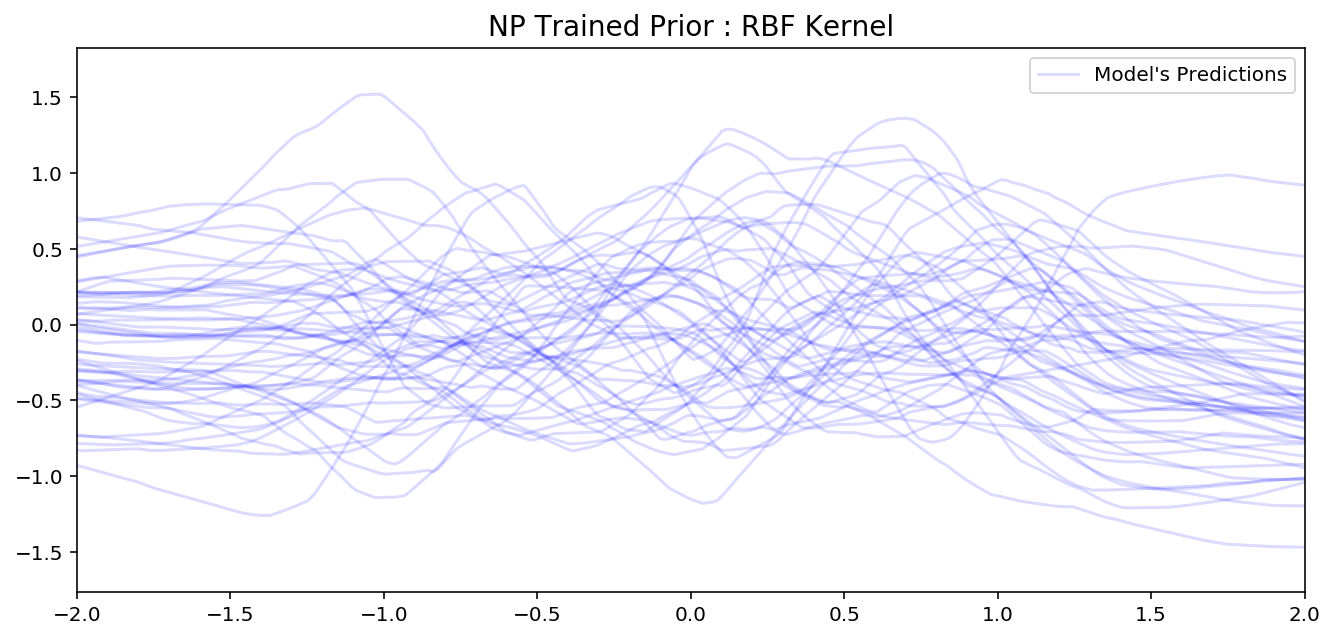

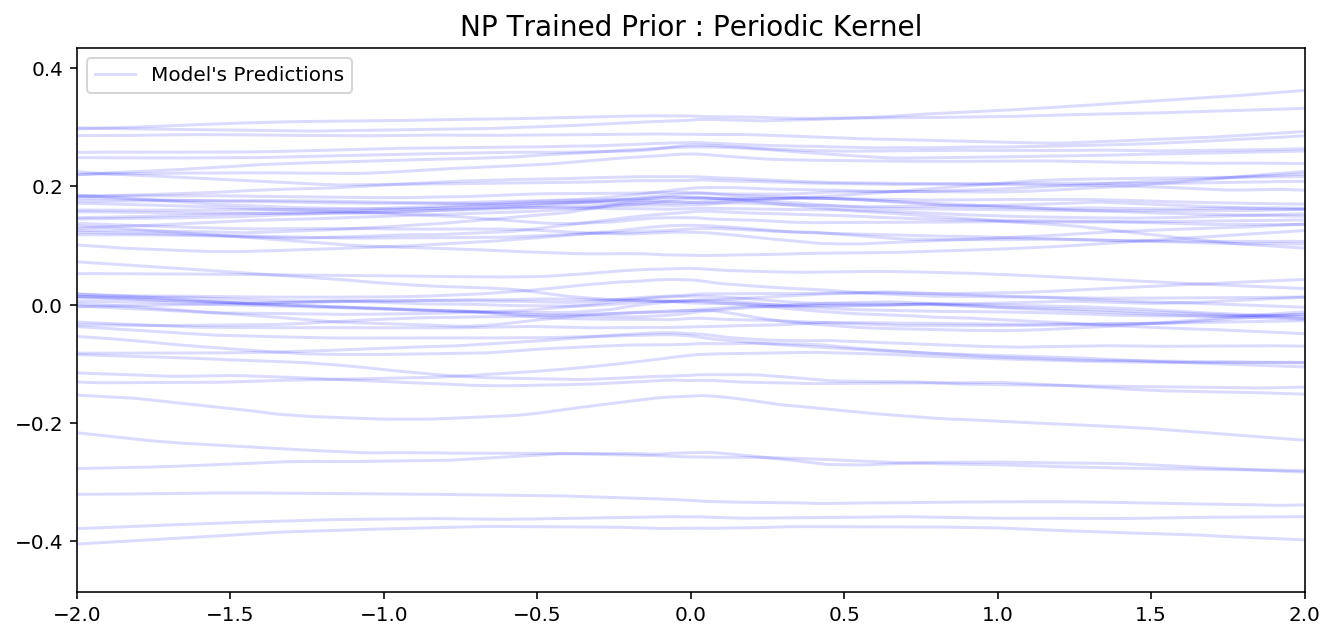

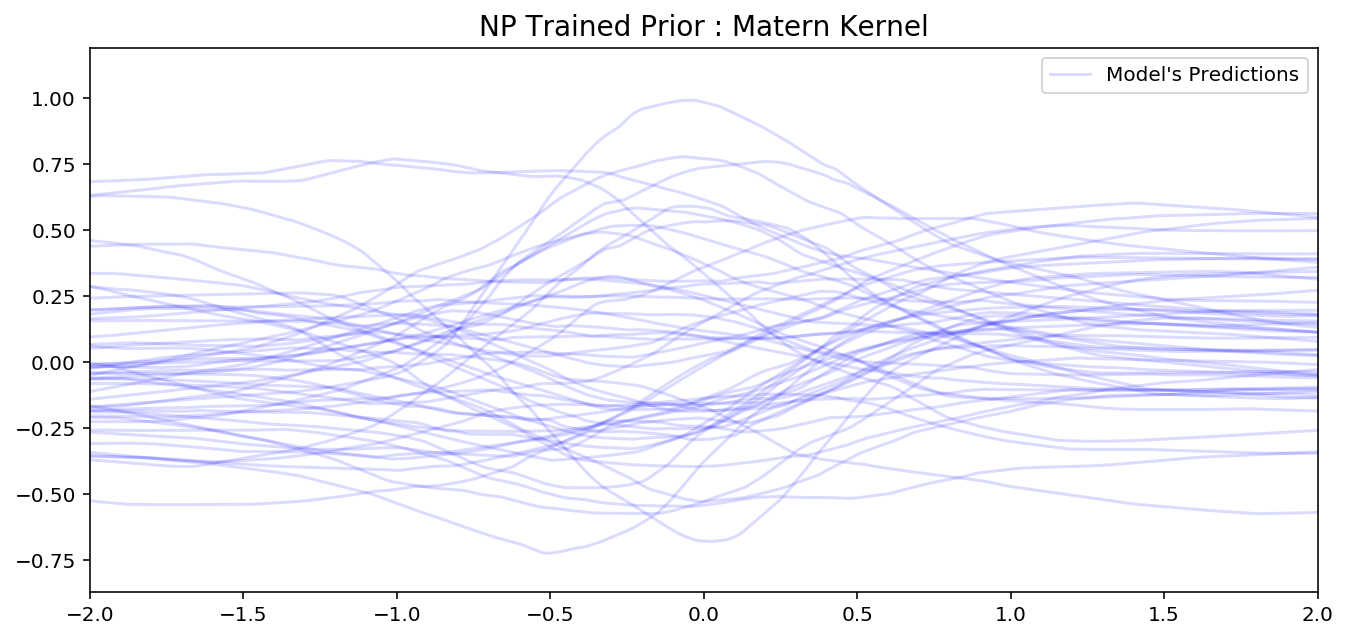

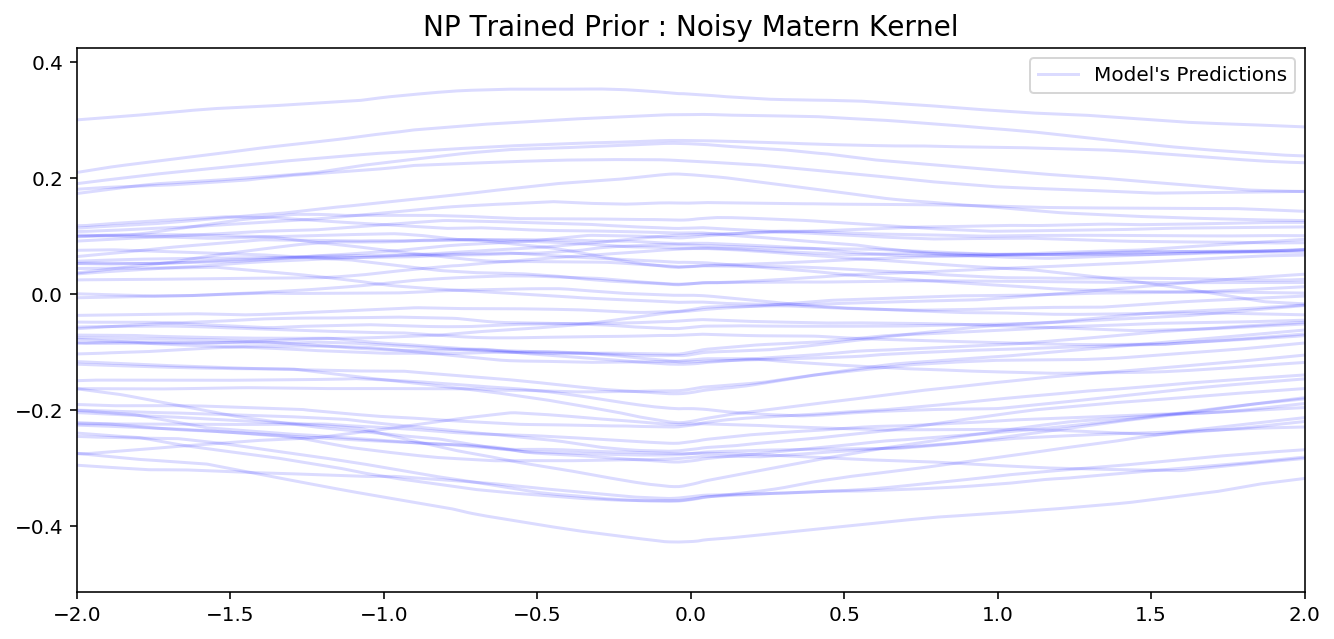

In [17]:
for k, trainer in trainers.items():
    plot_prior_samples(trainer.module_, 
                       title="NP Trained Prior : {}".format(k.split("/")[0].replace("_", " ")),
                       train_min_max=INTERPOLATION_RANGE)

# Posterior

In [22]:
from neuralproc.utils.datasplit import CntxtTrgtGetter, GetRandomIndcs, get_all_indcs

def get_n_cntxt(n_cntxt):
    return CntxtTrgtGetter(contexts_getter=GetRandomIndcs(min_n_indcs=n_cntxt, max_n_indcs=n_cntxt),
                         targets_getter=get_all_indcs,
                         is_add_cntxts_to_trgts=False)

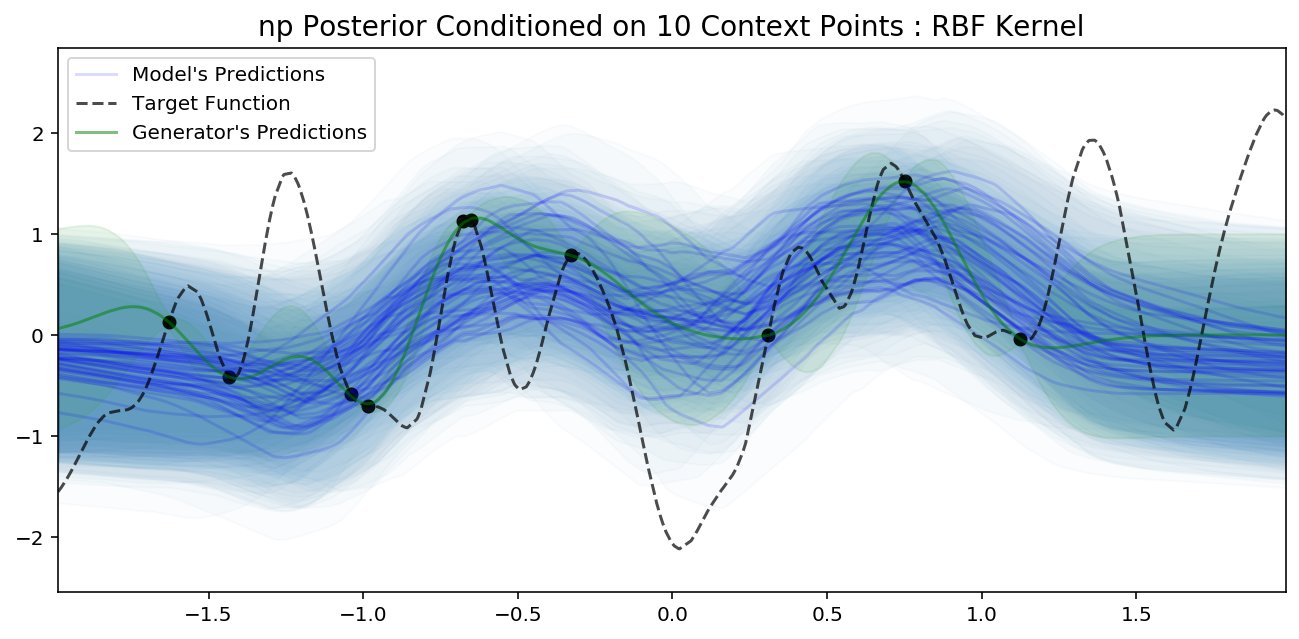

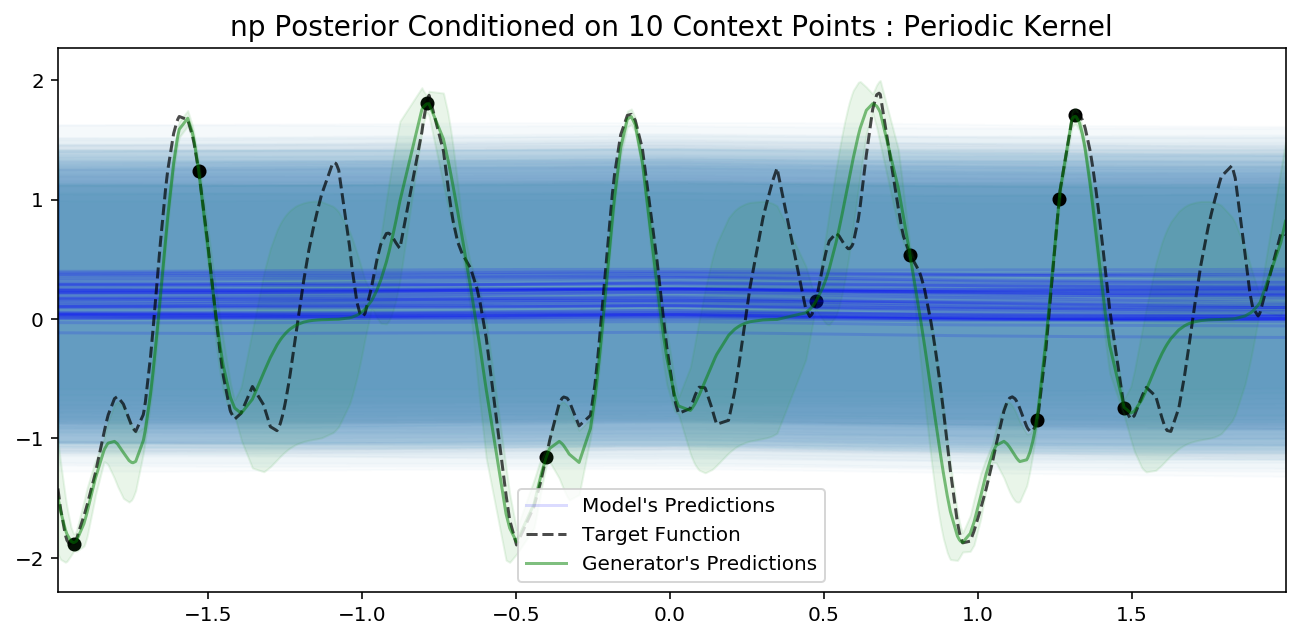

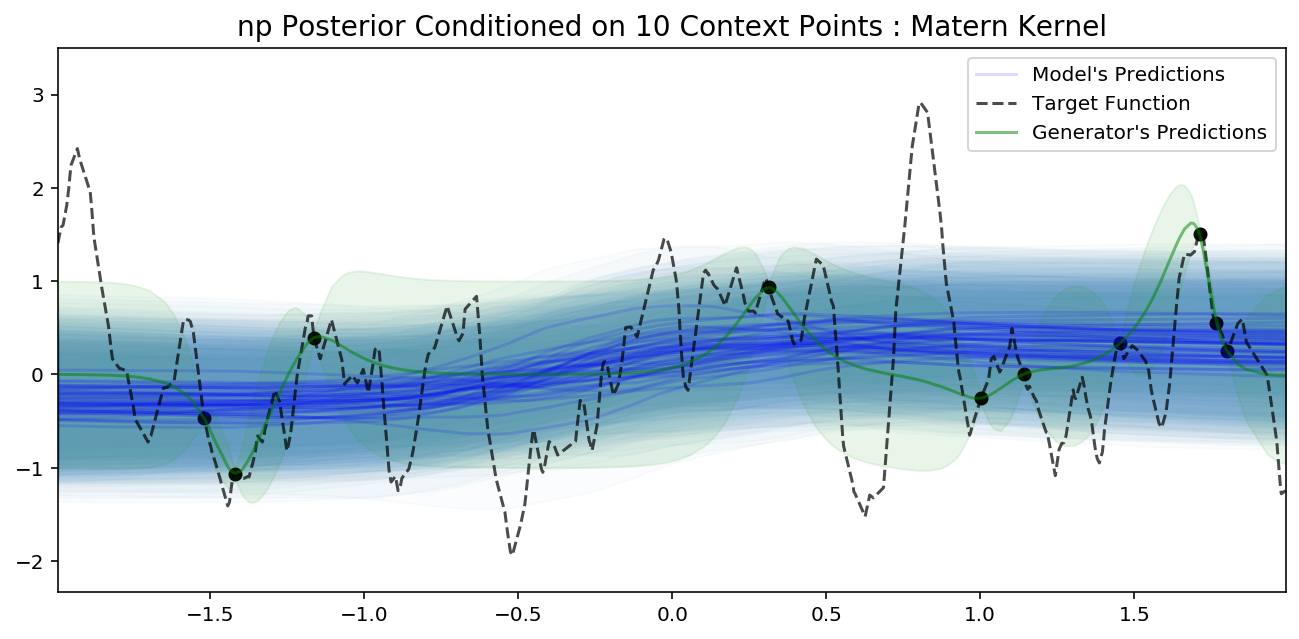

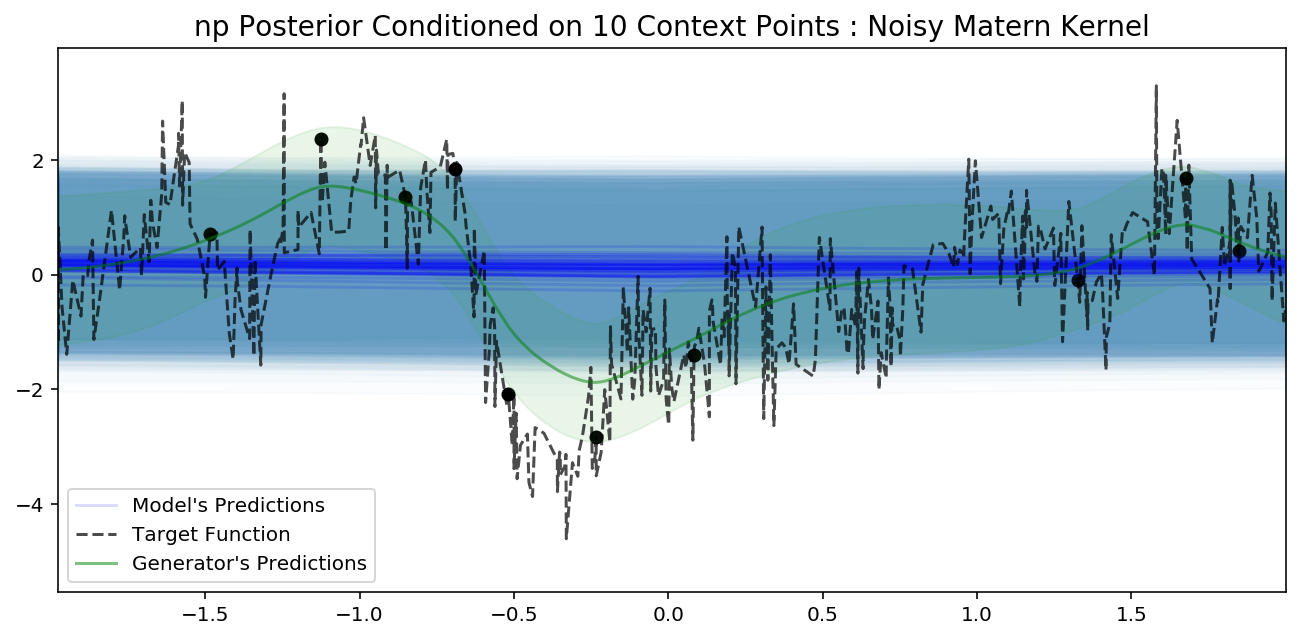

In [25]:
N_CNTXT = 10
for k, trainer in trainers.items():
    data_name = k.split("/")[0]
    model_name = k.split("/")[1]
    dataset = datasets[data_name]
    
    X, Y = dataset.get_samples(n_samples=1, 
                               n_points=3*N_POINTS) # use higher density for plotting 
        
    plot_posterior_samples(X, Y, get_n_cntxt(N_CNTXT), trainer.module_, 
                           generator=dataset.generator,
                           n_samples=50,
                           train_min_max=dataset.min_max,
                           is_plot_std=True,
                           title="{} Posterior Conditioned on {} Context Points : {}".format(model_name, N_CNTXT, data_name.replace("_", " ")))

In [ ]:
N_CNTXT = 30
for k, trainer in trainers.items():
    data_name = k.split("/")[0]
    model_name = k.split("/")[1]
    dataset = datasets[data_name]
    
    X, Y = dataset.get_samples(n_samples=1, 
                               n_points=3*N_POINTS) # use higher density for plotting 
        
    plot_posterior_samples(X, Y, get_n_cntxt(N_CNTXT), trainer.module_, 
                           generator=dataset.generator,
                           n_samples=50,
                           train_min_max=dataset.min_max,
                           is_plot_std=True,
                           title="{} Posterior Conditioned on {} Context Points : {}".format(model_name, N_CNTXT, data_name.replace("_", " ")))

std: 0.5300175428390502
std: 0.7591632759571076
std: 0.9252986013889315
std: 0.7208467626571656


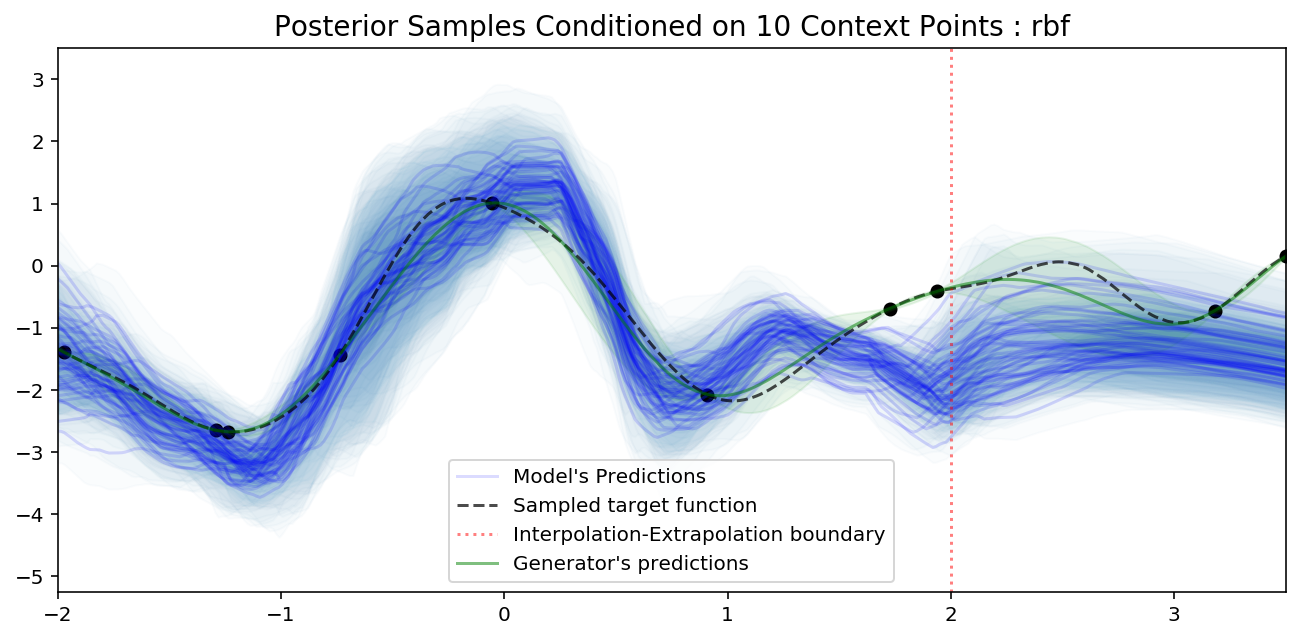

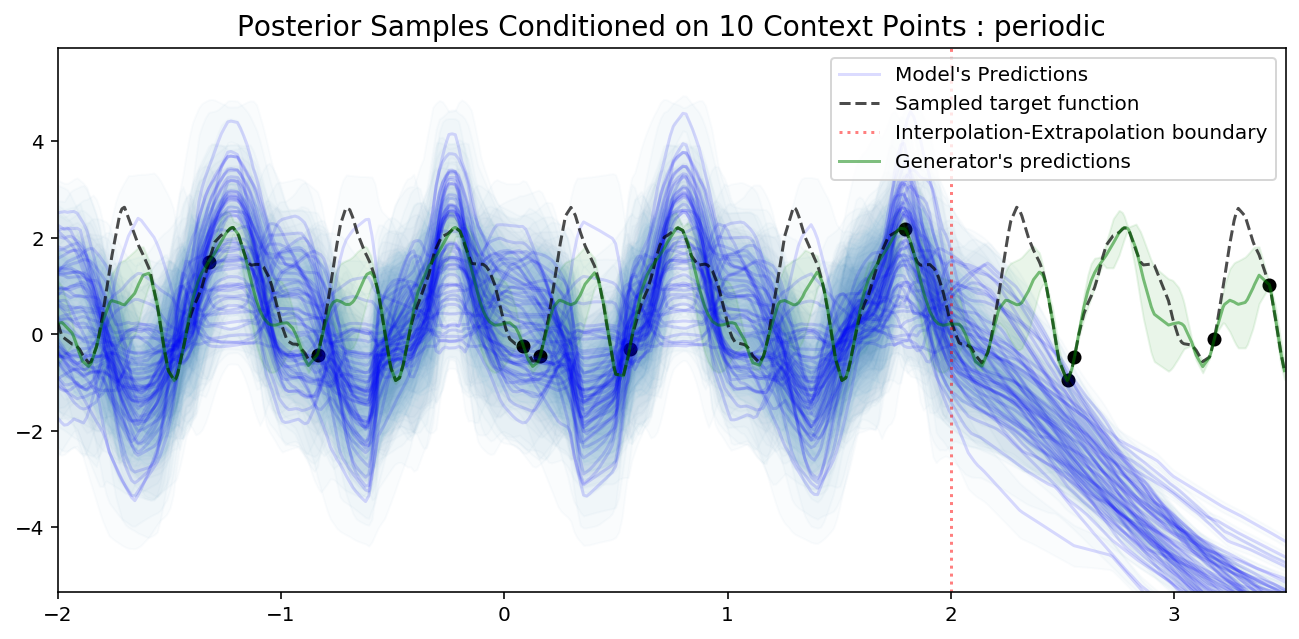

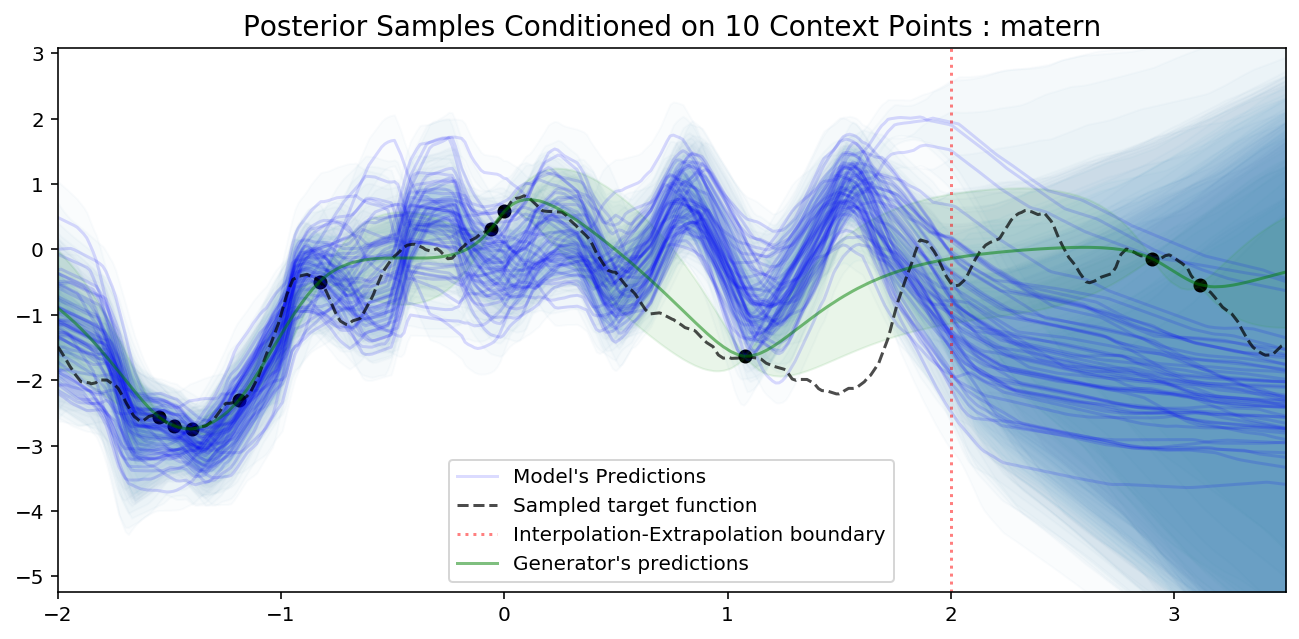

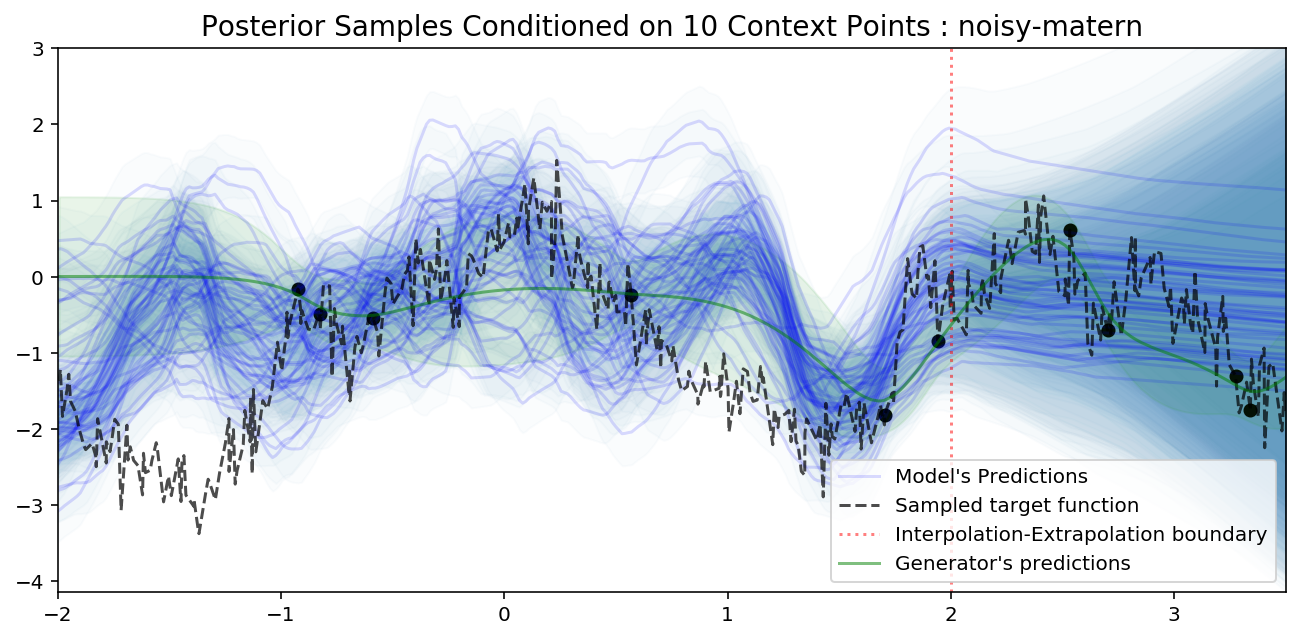

In [12]:
N_CNTXT = 10
for k,(neural_proc, dataset) in data_models.items():
    plot_posterior_samples(dataset, neural_proc, 
                           n_cntxt=N_CNTXT, 
                           test_min_max=EXTRAPOLATION_RANGE, 
                           n_points=3*N_POINTS,
                           title="Posterior Samples Conditioned on {} Context Points : {}".format(N_CNTXT, k))

We see that the predictions are not great.

**Good**:
- Less underfitting than CNP (probably because more parameters and due to the fact that latent path is trained uisng target points => more signal).
- Uncertainty at extrapolation is high (i.e. at least it knows that it doesn't do well)
- Good periodicity in interpolation
- Samples are actually varying (not just a simple shift of the samples)
- Differences in samples changes when using more context points.

**Bad**:
- still underfits:  most samples still don't pass through the context points even for datasets without noise
- completely fails when extrapolating

Note: although using the whole context set improves CNP it seemed to give the same or worst results for NP. 